

--------------------------
SUMMARY for class 0 (0):
Recall: 0.9572
Precision: 0.9872
Accuracy: 0.9582
Tested Instances Ratio: 0.7338 (703/958)
AUC: 0.9911


--------------------------
SUMMARY for class 1 (PE):
Recall: 0.7273
Precision: 0.5333
Accuracy: 0.9896
Tested Instances Ratio: 0.0157 (15/958)
AUC: 0.9868


--------------------------
SUMMARY for class 2 (PET):
Recall: 1.0000
Precision: 0.6667
Accuracy: 0.9979
Tested Instances Ratio: 0.0063 (6/958)
AUC: 1.0000


--------------------------
SUMMARY for class 3 (PP):
Recall: 1.0000
Precision: 1.0000
Accuracy: 1.0000
Tested Instances Ratio: 0.0010 (1/958)
AUC: 1.0000


--------------------------
SUMMARY for class 4 (PS):
Recall: 1.0000
Precision: 0.7391
Accuracy: 0.9937
Tested Instances Ratio: 0.0240 (23/958)
AUC: 0.9996


--------------------------
SUMMARY for class 5 (PVC):
Recall: 0.9720
Precision: 0.9043
Accuracy: 0.9854
Tested Instances Ratio: 0.1200 (115/958)
AUC: 0.9990


--------------------------
SUMMARY for class 6 (CuPC):


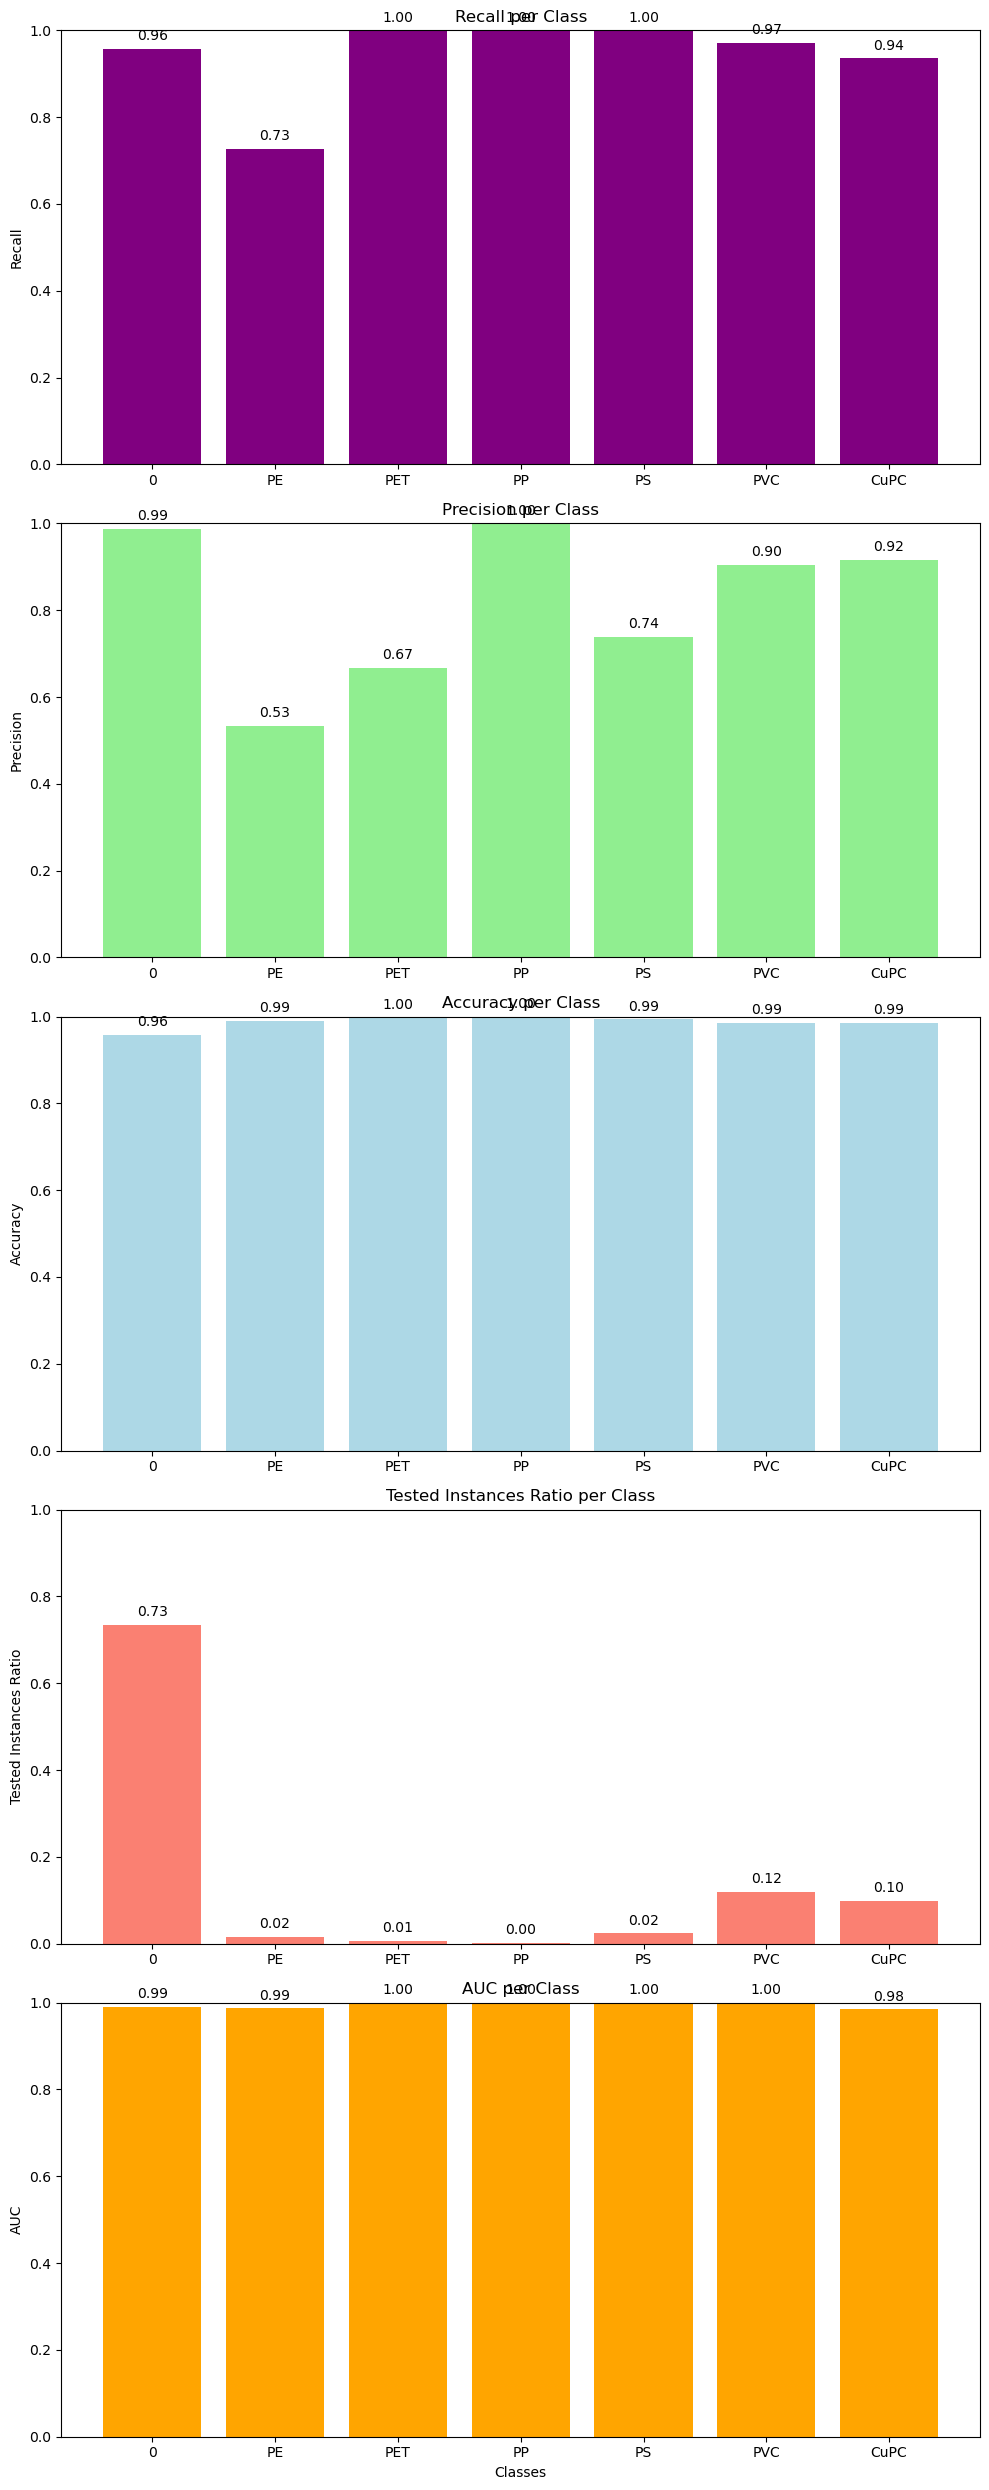

End


In [8]:
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# Define root directory and subdirectories
root = "C:/Users/PayaPc.Com/Downloads/43591_2023_57_MOESM2_ESM/" 
dataSplitDir = root + "DataSplit/"
modelDir = root + "DataModels/"
class_names = ['0', 'PE', 'PET', 'PP', 'PS', 'PVC', 'CuPC']

# Load the stacking model
model = joblib.load(modelDir + 'stacking_model_scikit.pkl')

# Load test data
test_data = np.load(dataSplitDir + 'test.npz')
X_test = test_data['x']
y_test = test_data['y']

# Replace NaN values with zero
X_test[np.isnan(X_test)] = 0

# Get probability predictions and class predictions from the stacking model
y_prob = model.predict_proba(X_test)  # Probabilities for AUC
y_pred = model.predict(X_test)        # Class predictions for other metrics

# Lists to store metrics
recalls = []
precisions = []
accuracies = []
tested_instances_ratios = []
aucs = []
class_indices = range(0, 7)  # Classes from 0 to 6

# Calculate metrics for each class
for classInd in class_indices:
    # Convert labels and predictions to binary for the specific class
    y_test_class = (y_test == classInd).astype(int)
    y_pred_class = (y_pred == classInd).astype(int)
    
    # Calculate TP, FP, FN
    tp = np.sum((y_test_class == 1) & (y_pred_class == 1))  # True Positives
    fp = np.sum((y_test_class == 0) & (y_pred_class == 1))  # False Positives
    fn = np.sum((y_test_class == 1) & (y_pred_class == 0))  # False Negatives
    
    # Calculate metrics
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    accuracy = accuracy_score(y_test_class, y_pred_class)
    tested_ratio = np.sum(y_pred_class) / len(y_test) if len(y_test) > 0 else 0.0
    auc = roc_auc_score(y_test_class, y_prob[:, classInd])  # Probabilities for the specific class
    
    # Store metrics
    recalls.append(recall)
    precisions.append(precision)
    accuracies.append(accuracy)
    tested_instances_ratios.append(tested_ratio)
    aucs.append(auc)
    
    # Print results
    print(f"\n\n--------------------------")
    print(f"SUMMARY for class {classInd} ({class_names[classInd]}):")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Tested Instances Ratio: {tested_ratio:.4f} ({np.sum(y_pred_class)}/{len(y_test)})")
    print(f"AUC: {auc:.4f}")

# Plot the metrics
fig, axs = plt.subplots(5, 1, figsize=(10, 25))  # Five vertical subplots

# Plot Recall
axs[0].bar(class_indices, recalls, color='purple', tick_label=[class_names[i] for i in class_indices])
axs[0].set_title('Recall per Class')
axs[0].set_ylabel('Recall')
axs[0].set_ylim(0, 1)
for i, v in enumerate(recalls):
    axs[0].text(i, v + 0.02, f'{v:.2f}', ha='center')

# Plot Precision
axs[1].bar(class_indices, precisions, color='lightgreen', tick_label=[class_names[i] for i in class_indices])
axs[1].set_title('Precision per Class')
axs[1].set_ylabel('Precision')
axs[1].set_ylim(0, 1)
for i, v in enumerate(precisions):
    axs[1].text(i, v + 0.02, f'{v:.2f}', ha='center')

# Plot Accuracy
axs[2].bar(class_indices, accuracies, color='lightblue', tick_label=[class_names[i] for i in class_indices])
axs[2].set_title('Accuracy per Class')
axs[2].set_ylabel('Accuracy')
axs[2].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axs[2].text(i, v + 0.02, f'{v:.2f}', ha='center')

# Plot Tested Instances Ratio
axs[3].bar(class_indices, tested_instances_ratios, color='salmon', tick_label=[class_names[i] for i in class_indices])
axs[3].set_title('Tested Instances Ratio per Class')
axs[3].set_ylabel('Tested Instances Ratio')
axs[3].set_ylim(0, 1)
for i, v in enumerate(tested_instances_ratios):
    axs[3].text(i, v + 0.02, f'{v:.2f}', ha='center')

# Plot AUC
axs[4].bar(class_indices, aucs, color='orange', tick_label=[class_names[i] for i in class_indices])
axs[4].set_title('AUC per Class')
axs[4].set_xlabel('Classes')
axs[4].set_ylabel('AUC')
axs[4].set_ylim(0, 1)
for i, v in enumerate(aucs):
    axs[4].text(i, v + 0.02, f'{v:.2f}', ha='center')

# Adjust layout and display
plt.tight_layout()
plt.show()

print("End")